### Weight initialization technique:
1. Xavier/Glorot

2. He Initialization





### Xavier/Glorot
-> used tanh/sigmoid activation function in hidden layers

-> for tanh activation function we get a better performance

-> Has two formula
1. Normal
2. Uniform

Today's tutorial we apply 'Xavier/Glorot normal' technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


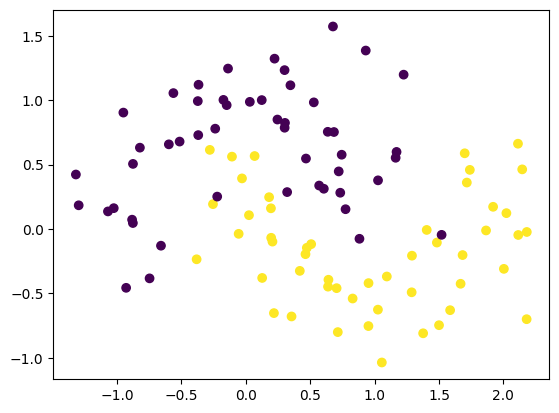

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

used 'glorot_normal' for weights initialization

In [10]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh', kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.get_weights()

[array([[ 0.41084662, -0.17112249, -0.37468636,  0.9168396 ,  0.6098468 ,
         -0.1455898 ,  0.36797634, -0.00583094, -0.38255173,  0.25162846],
        [-0.73712087, -0.29597437,  0.8901308 ,  0.2403792 ,  0.23896587,
         -0.49049985,  0.4635483 , -0.9007323 , -0.46477905, -0.05712068]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.3268203 ,  0.24162085,  0.1743205 ,  0.15170577, -0.03286752,
          0.3320195 ,  0.16283792, -0.19808158,  0.08380002, -0.11298964],
        [-0.05137789,  0.06197721,  0.22787811, -0.05930483,  0.13451691,
         -0.57167846, -0.53053874, -0.09772917, -0.00702363, -0.11255876],
        [ 0.45598087, -0.13833149,  0.4207694 , -0.1821833 ,  0.25547293,
         -0.38207093,  0.19502147, -0.4476434 ,  0.0565059 , -0.5531405 ],
        [ 0.40443704,  0.31179342, -0.0615893 ,  0.1584872 , -0.0250416 ,
         -0.07240665,  0.08304426,  0.11090916, -0.32756573, -0.17673548],
        [-0.29657

In [12]:
model.get_weights()[8]

array([[ 0.4693554 ],
       [ 0.06179661],
       [ 0.46074682],
       [ 0.63263255],
       [ 0.62397546],
       [-0.5575396 ],
       [ 0.6217515 ],
       [-0.1903804 ],
       [-0.56132305],
       [ 0.38809305]], dtype=float32)

In [14]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.4375 - loss: 0.7342 - val_accuracy: 0.3000 - val_loss: 0.7796
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4375 - loss: 0.7042 - val_accuracy: 0.3000 - val_loss: 0.7479
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4984 - loss: 0.6906 - val_accuracy: 0.4000 - val_loss: 0.7168
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6266 - loss: 0.6605 - val_accuracy: 0.5500 - val_loss: 0.6877
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6672 - loss: 0.6477 - val_accuracy: 0.7000 - val_loss: 0.6599
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6992 - loss: 0.6244 - val_accuracy: 0.8000 - val_loss: 0.6343
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7398 - loss: 0.6157 - val_accuracy: 0.8500 - val_loss: 0.6098
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7430 - loss: 0.6098 - val_accuracy: 0.8000 - val_loss

In [16]:
model.get_weights()

[array([[ 0.35290983, -0.20048194, -0.42926916,  0.9674801 ,  0.5675156 ,
         -0.03971603,  0.32546288, -0.04802066, -0.31369323,  0.28115973],
        [-0.706337  , -0.20610131,  0.96401167,  0.24891916,  0.1615408 ,
         -0.57449424,  0.51029056, -0.85100985, -0.5096646 , -0.17859304]],
       dtype=float32),
 array([-0.04905389,  0.06771693,  0.03908196, -0.16412163,  0.06763967,
         0.01414764, -0.08665974, -0.03029502,  0.07135104, -0.04078995],
       dtype=float32),
 array([[ 2.43678480e-01,  3.62340063e-01,  1.03102036e-01,
          2.44091526e-01, -1.20153353e-01,  3.36786926e-01,
          7.49805123e-02, -9.87380445e-02,  1.46957681e-01,
         -8.32821503e-02],
        [ 5.24413015e-04,  1.30853131e-01,  2.32705191e-01,
          3.41919810e-02,  1.56900182e-01, -6.06046677e-01,
         -3.89199942e-01,  2.28951499e-02, -5.69946598e-03,
          2.13744259e-03],
        [ 5.37191451e-01, -2.60580361e-01,  4.92647678e-01,
         -2.71624476e-01,  3.41827

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

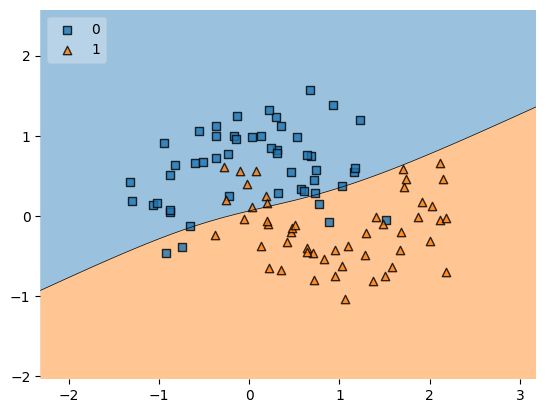

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype(int),clf=model,legend=2)